In [1]:
# MASLD Awareness Tracker - Results Notebook
"This project tracks and analyzes public and scientific awareness of Metabolic Dysfunction-Associated Steatotic Liver Disease (MASLD) in relation to FDA drug approvals of Resmetirom and GLP-1 agonists, examining impacts across search trends, scientific literature, social media, stock markets, and news media."

import os
import sys
import pandas as pd
from pathlib import Path

# Set up matplotlib for notebook display
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

# Add project root to path for imports
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from config import DATA_DIR, RESULTS_DIR, STUDY_START_DATE, STUDY_END_DATE, FDA_EVENT_DATES

# NOTE: All required packages (including gdown) are installed via requirements.txt

In [2]:
# Create directories
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"Study Period: {STUDY_START_DATE} to {STUDY_END_DATE}")
print(f"FDA Events: {FDA_EVENT_DATES}")
print(f"Data Sources: Google Trends, Stock Data, Reddit, PubMed, Media Cloud")

Study Period: 2023-01-01 to 2025-10-28
FDA Events: {'Resmetirom Approval': '2024-03-14', 'GLP-1 Agonists Approval': '2025-08-15'}
Data Sources: Google Trends, Stock Data, Reddit, PubMed, Media Cloud


In [2]:
# --- Core Analysis Pipeline ---
print("=== CORE ANALYSIS PIPELINE ===")
from load import get_google_trends_data, get_stock_data, get_reddit_data, get_pubmed_data, get_media_cloud_data
from process import process_google_trends, process_stock_data, process_reddit_data, process_pubmed_data
from analyze import (analyze_google_trends, analyze_stock_and_events, analyze_reddit_sentiment,
                    analyze_pubmed_publication_rate, advanced_pubmed_analysis,
                    advanced_google_trends_analysis, advanced_reddit_sentiment_analysis,
                    analyze_reddit_topics, analyze_temporal_patterns, correlate_reddit_trends,
                    analyze_subreddit_networks)

=== CORE ANALYSIS PIPELINE ===


In [3]:
# Install required package for Google Drive fallback
!pip install gdown

In [5]:
# Check if gdown is available for Google Drive fallback
try:
    import gdown
    gdown_available = True
    print("gdown package available for Google Drive fallback")
except ImportError:
    gdown_available = False
    print("gdown package not available - install with: pip install gdown")

gdown package available for Google Drive fallback


=== GOOGLE TRENDS ANALYSIS ===
Attempting API data retrieval...

[Loading] Fetching Google Trends data for: ['MASLD', 'NAFLD', 'Rezdiffra', 'Wegovy', 'Ozempic']
[Success] Google Trends data saved to: google_trends_initial_data.csv
[Processing] Cleaning Google Trends data...
  > Trends data ready. Shape: (148, 5)
=== API PATH DEBUG ===
processed_trends type: <class 'pandas.core.frame.DataFrame'>
processed_trends shape: (148, 5)
Index: DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15'], dtype='datetime64[ns]', name='date', freq=None) ... DatetimeIndex(['2025-10-12', '2025-10-19', '2025-10-26'], dtype='datetime64[ns]', name='date', freq=None)
Columns: ['MASLD', 'NAFLD', 'Rezdiffra', 'Wegovy', 'Ozempic']
Data types:
MASLD        int64
NAFLD        int64
Rezdiffra    int64
Wegovy       int64
Ozempic      int64
dtype: object

Sample values:
  MASLD: min=0, max=1, mean=0.088
  NAFLD: min=0, max=1, mean=0.993
  Rezdiffra: min=0, max=1, mean=0.068
  Wegovy: min=15, max=35, mean=24.223
  O

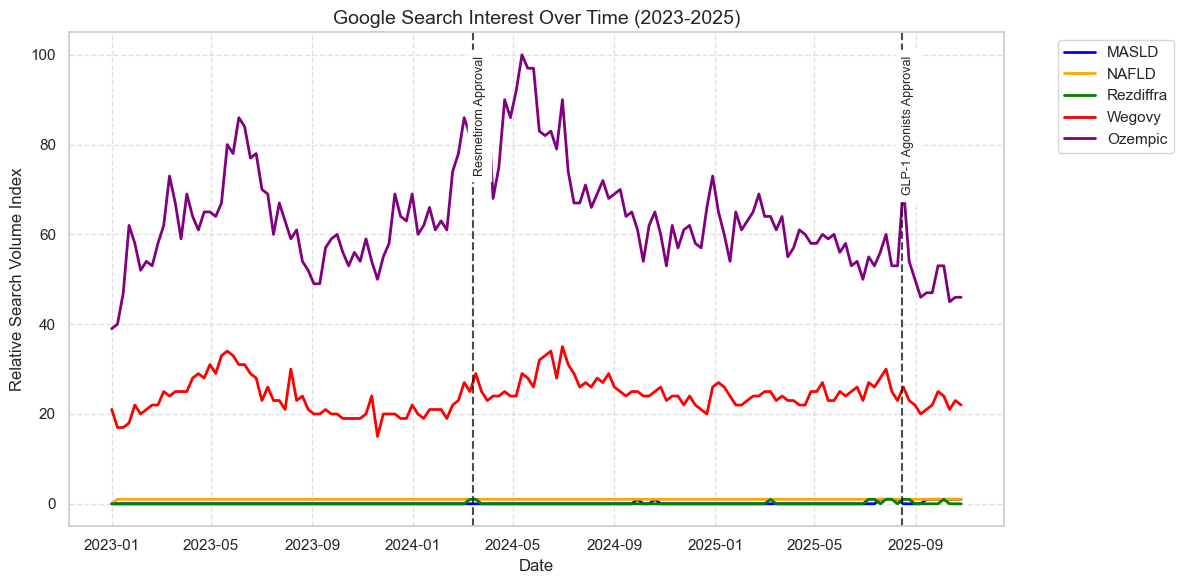

  > Displayed Google Trends plot in notebook
Google Trends analysis completed via API
Google Trends EDA completed. Run advanced analysis in next cell.


In [4]:
# Google Trends Analysis (with API first, fallback to G-Drive)
print("=== GOOGLE TRENDS ANALYSIS ===")

# Method 1: API Approach
print("Attempting API data retrieval...")
try:
    trends_data = get_google_trends_data()
    if trends_data is not None:
        processed_trends = process_google_trends(trends_data)

        # === DEBUG FOR API PATH ===
        print("=== API PATH DEBUG ===")
        print(f"processed_trends type: {type(processed_trends)}")
        print(f"processed_trends shape: {processed_trends.shape}")
        print(f"Index: {processed_trends.index[:3]} ... {processed_trends.index[-3:]}")
        print(f"Columns: {processed_trends.columns.tolist()}")
        print(f"Data types:\n{processed_trends.dtypes}")
        print("\nSample values:")
        for col in processed_trends.columns:
            print(f"  {col}: min={processed_trends[col].min()}, max={processed_trends[col].max()}, mean={processed_trends[col].mean():.3f}")
        print("="*50)
        # === END DEBUG ===

        analyze_google_trends(processed_trends, notebook_plot=True)
        print("Google Trends analysis completed via API")
    else:
        raise Exception("API returned no data")

except Exception as e:
    print(f"API approach failed: {e}")

    # Method 2: Google Drive Fallback
    print("Falling back to Google Drive data...")
    try:
        from config import load_google_trends_from_drive
        drive_data = load_google_trends_from_drive()

        if drive_data is not None:
            processed_trends = process_google_trends(drive_data)

            # Add Data Preview:
            print(f"Google Trends data shape: {processed_trends.shape}")
            print("First 3 rows of Google Trends data:")
            print(processed_trends.head(3))
            print("="*50)

            # === DEBUG FOR DRIVE PATH ===
            print("=== DRIVE PATH DEBUG ===")
            print(f"processed_trends type: {type(processed_trends)}")
            print(f"processed_trends shape: {processed_trends.shape}")
            print(f"Index: {processed_trends.index[:3]} ... {processed_trends.index[-3:]}")
            print(f"Columns: {processed_trends.columns.tolist()}")
            print(f"Data types:\n{processed_trends.dtypes}")
            print("\nSample values:")
            for col in processed_trends.columns:
                print(f"  {col}: min={processed_trends[col].min()}, max={processed_trends[col].max()}, mean={processed_trends[col].mean():.3f}")
            print("="*50)
            # === END DEBUG ===

            # Import and configure matplotlib explicitly
            import matplotlib.pyplot as plt
            get_ipython().run_line_magic('matplotlib', 'inline')

            # Run analysis and force display
            analyze_google_trends(processed_trends, notebook_plot=True)

            save_path = RESULTS_DIR / GOOGLE_TRENDS_ANALYSIS_SUBDIR / "google_trends_basic_analysis.png"
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Basic plot saved to: {save_path}")

            # Ensure plot displays
            plt.show()
            print("Google Trends analysis completed using Google Drive data")
        else:
            print("Google Drive approach failed")

    except Exception as drive_error:
        print(f"Google Drive approach failed: {drive_error}")

print("Google Trends EDA completed. Run advanced analysis in next cell.")

In [5]:
# Check if processed_trends exists and has good data
print("Data Status Check:")
print(f"processed_trends exists: {'processed_trends' in locals()}")
if 'processed_trends' in locals():
    print(f"Data shape: {processed_trends.shape}")
    print(f"MASLD mean: {processed_trends['MASLD'].mean()}")
    print(f"NAFLD mean: {processed_trends['NAFLD'].mean()}")
else:
    print("ERROR: Run Google Trends EDA cell first!")

Data Status Check:
processed_trends exists: True
Data shape: (148, 5)
MASLD mean: 0.08783783783783784
NAFLD mean: 0.9932432432432432


Running Advanced Statistical Analysis...
Step 1: Saving analysis figure...
Data Quality Check:
  MASLD: 2 unique values, 91.2% zeros
  NAFLD: 2 unique values, 0.7% zeros
  Rezdiffra: 2 unique values, 93.2% zeros
  Wegovy: 20 unique values, 0.0% zeros
  Ozempic: 43 unique values, 0.0% zeros

[Advanced Analysis] Google Trends Statistical Analysis...


C:\Users\somay\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


  > Saved timeline to: advanced_google_trends_timeline.png
  > Saved correlation to: advanced_google_trends_correlation.png
  > Saved impact analysis to: advanced_google_trends_impact.png
  > Saved statistical table to: advanced_google_trends_statistical_table.png
Step 2: Displaying analysis figure...
Data Quality Check:
  MASLD: 2 unique values, 91.2% zeros
  NAFLD: 2 unique values, 0.7% zeros
  Rezdiffra: 2 unique values, 93.2% zeros
  Wegovy: 20 unique values, 0.0% zeros
  Ozempic: 43 unique values, 0.0% zeros

[Advanced Analysis] Google Trends Statistical Analysis...


C:\Users\somay\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


  > Saved timeline to: advanced_google_trends_timeline.png
  > Saved correlation to: advanced_google_trends_correlation.png
  > Saved impact analysis to: advanced_google_trends_impact.png
  > Saved statistical table to: advanced_google_trends_statistical_table.png


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

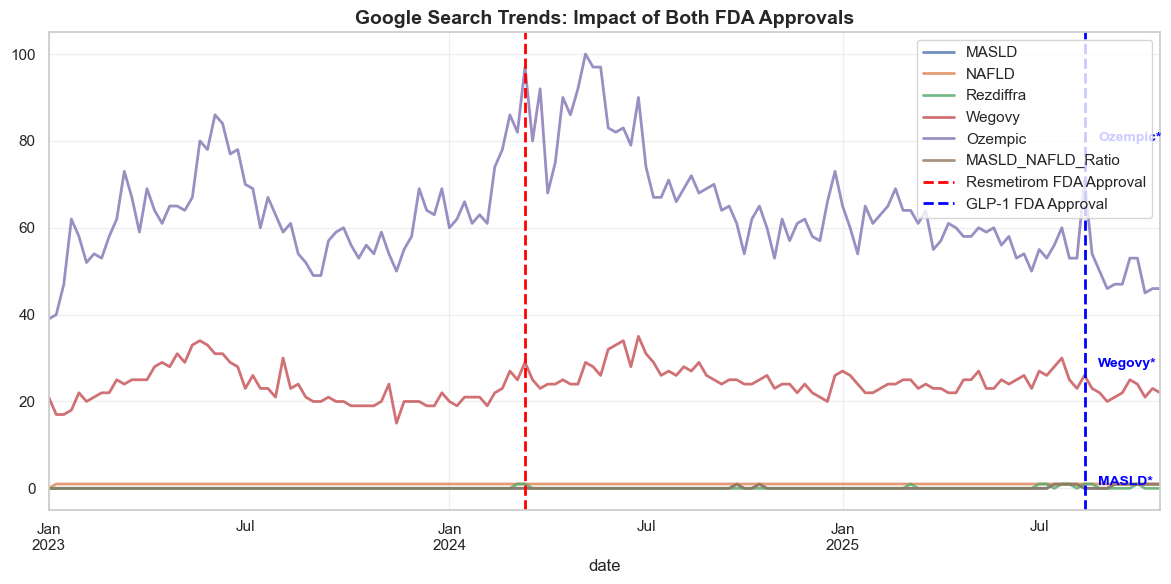

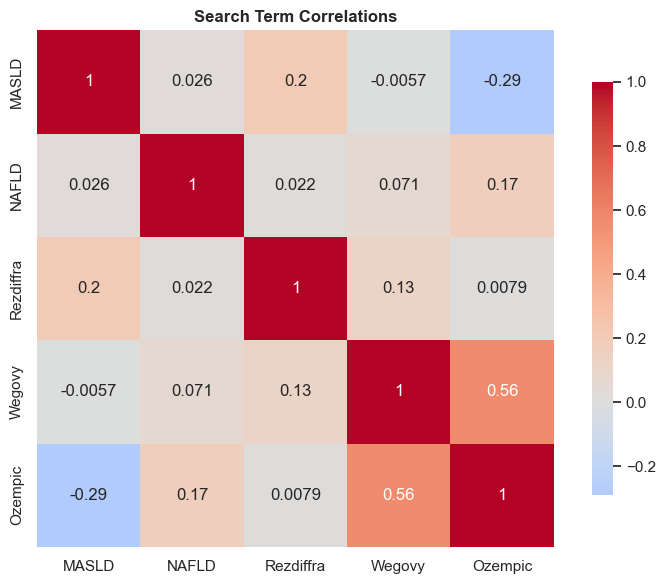

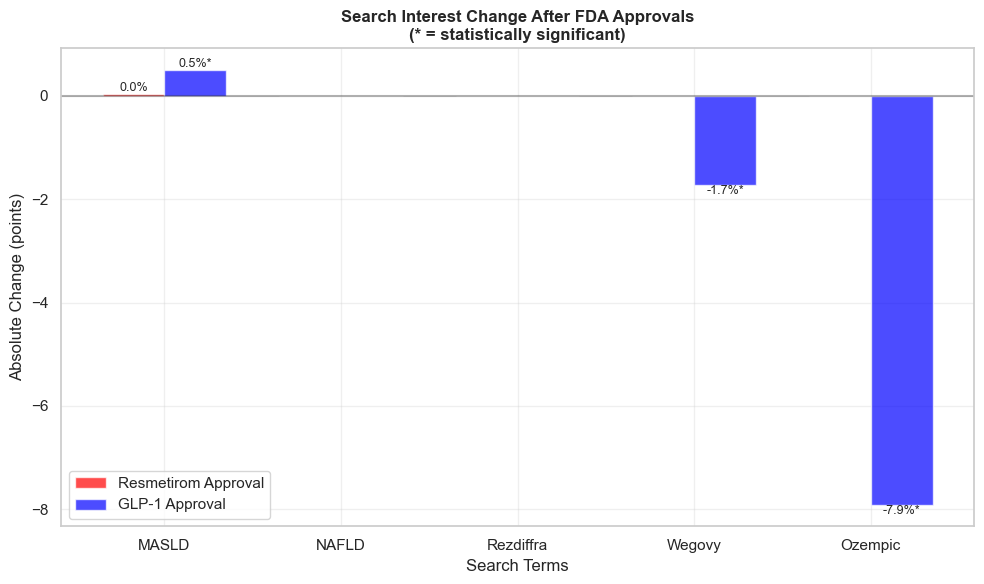

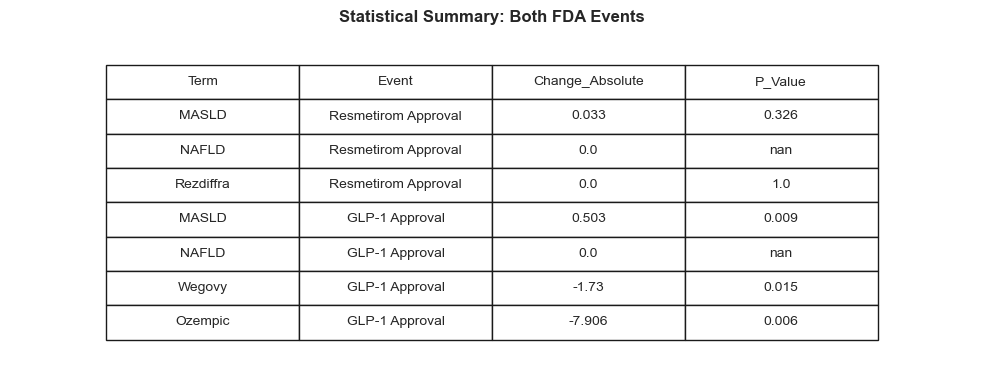


STATISTICAL RESULTS:

Resmetirom Approval:
  MASLD: +0.033 points (p=0.326) [not significant]
  NAFLD: +0.000 points (p=nan) [not significant]
  Rezdiffra: +0.000 points (p=1.000) [not significant]

GLP-1 Approval:
  MASLD: +0.503 points (p=0.009) [SIGNIFICANT]
  NAFLD: +0.000 points (p=nan) [not significant]
  Wegovy: -1.730 points (p=0.015) [SIGNIFICANT]
  Ozempic: -7.906 points (p=0.006) [SIGNIFICANT]


In [5]:
# ADVANCED GOOGLE TRENDS ANALYSIS
print("Running Advanced Statistical Analysis...")

from analyze import advanced_google_trends_analysis
import matplotlib.pyplot as plt
from config import RESULTS_DIR, GOOGLE_TRENDS_ANALYSIS_SUBDIR

# FIRST: Run analysis to SAVE the figure
print("Step 1: Saving analysis figure...")
advanced_results = advanced_google_trends_analysis(processed_trends, notebook_plot=False)

# SECOND: Run analysis again to DISPLAY the figure
print("Step 2: Displaying analysis figure...")
advanced_google_trends_analysis(processed_trends, notebook_plot=True)

# THIRD: Show statistical results
print("\nSTATISTICAL RESULTS:")
for event_name, event_data in [('Resmetirom Approval', advanced_results['resmetirom_impact']),
                               ('GLP-1 Approval', advanced_results['glp1_impact'])]:
    print(f"\n{event_name}:")
    for term, stats in event_data.items():
        sig = "SIGNIFICANT" if stats['p_value'] < 0.05 else "not significant"
        print(f"  {term}: {stats['change_absolute']:+.3f} points (p={stats['p_value']:.3f}) [{sig}]")

In [8]:
# REDDIT ANALYSIS - FULL API DEMONSTRATION
# This block demonstrates complete API data collection and processing
# Note: This may take 5-10 minutes to complete due to API rate limits
# For faster testing, use the "QUICK ANALYSIS" block below

print("=== REDDIT ANALYSIS - FULL API DEMONSTRATION ===")
print("This demonstrates complete Reddit API data collection and processing")
print("Note: This may take several minutes due to API rate limits")

# Method 1: Complete API Approach
print("Starting API data collection...")
try:
    reddit_data = get_reddit_data()
    if reddit_data is not None:
        print("API data collection completed successfully")
        print(f"Collected {len(reddit_data)} records from Reddit API")

        # Process the API data
        print("Processing API data for sentiment analysis...")
        processed_reddit = process_reddit_data(reddit_data)

        # Generate analysis and visualizations
        print("Generating sentiment analysis and visualizations...")
        analyze_reddit_sentiment(processed_reddit, notebook_plot=True)

        print("Reddit sentiment analysis completed using full API pipeline")
        print("This demonstrates successful API integration and data processing")

    else:
        print("API returned no data - this demonstrates API limitations")
        raise Exception("API returned no data")

except Exception as e:
    print(f"API approach encountered issues: {e}")
    print("This demonstrates real-world API challenges that require fallback solutions")
    print("For reliable analysis, use the QUICK ANALYSIS block with pre-collected data")

=== REDDIT ANALYSIS - FULL API DEMONSTRATION ===
This demonstrates complete Reddit API data collection and processing
Note: This may take several minutes due to API rate limits
Starting API data collection...

[Loading] Connecting to Reddit API and fetching data...
  > Collecting hot posts from r/NAFLD...
  > Collecting hot posts from r/MASH...
  > Collecting hot posts from r/NASH...
  > Collecting hot posts from r/MASLD...
  > Collecting hot posts from r/obesity...
  > Searching r/Ozempic for term: 'NAFLD'...
  > Searching r/Ozempic for term: 'NASH'...
  > Searching r/Ozempic for term: 'MASLD'...
  > Searching r/Ozempic for term: 'fatty liver'...
  > Searching r/Ozempic for term: 'liver'...
  > Searching r/Ozempic for term: 'Semaglutide'...
  > Searching r/Wegovy for term: 'NAFLD'...
  > Searching r/Wegovy for term: 'NASH'...
  > Searching r/Wegovy for term: 'MASLD'...
  > Searching r/Wegovy for term: 'fatty liver'...
  > Searching r/Wegovy for term: 'liver'...
  > Searching r/Wegovy 

=== REDDIT ANALYSIS - DEVELOPMENT VERSION ===
Using pre-collected data for fast, reliable analysis during development
Google Drive fallback ensures consistent results despite API limitations


Downloading...
From: https://drive.google.com/uc?id=1atMK_8axChUJMtzw8e7iv46tEehPTSsK
To: C:\Users\somay\AppData\Local\Temp\tmp6oc9tl8s.csv
100%|██████████| 4.73M/4.73M [00:00<00:00, 10.4MB/s]


Reddit data loaded from Google Drive
Pre-collected data loaded: (9255, 14) records available
Data columns: ['subreddit', 'search_term', 'post_id', 'post_title', 'post_text', 'post_score', 'post_url', 'author', 'timestamp', 'num_comments', 'type', 'comment_id', 'comment_text', 'comment_score']
Data is already in processed format - proceeding directly to analysis
Data ready for analysis: (9255, 14)
Final columns: ['subreddit', 'search_term', 'post_id', 'post_title', 'post_text', 'post_score', 'post_url', 'author', 'timestamp', 'num_comments', 'type', 'comment_id', 'comment_text', 'comment_score']
[Processing] Performing Sentiment Analysis on Reddit data...
  > Reddit data with sentiment ready. Shape: (9146, 17)
Reddit data shape after processing: (9146, 17)
First 3 rows of Reddit sentiment data:
  subreddit           timestamp  sentiment_score
0     NAFLD 2025-10-27 12:41:03           0.9555
1     NAFLD 2025-10-27 14:33:51           0.8020
2     NAFLD 2025-10-27 19:43:16           0.2732

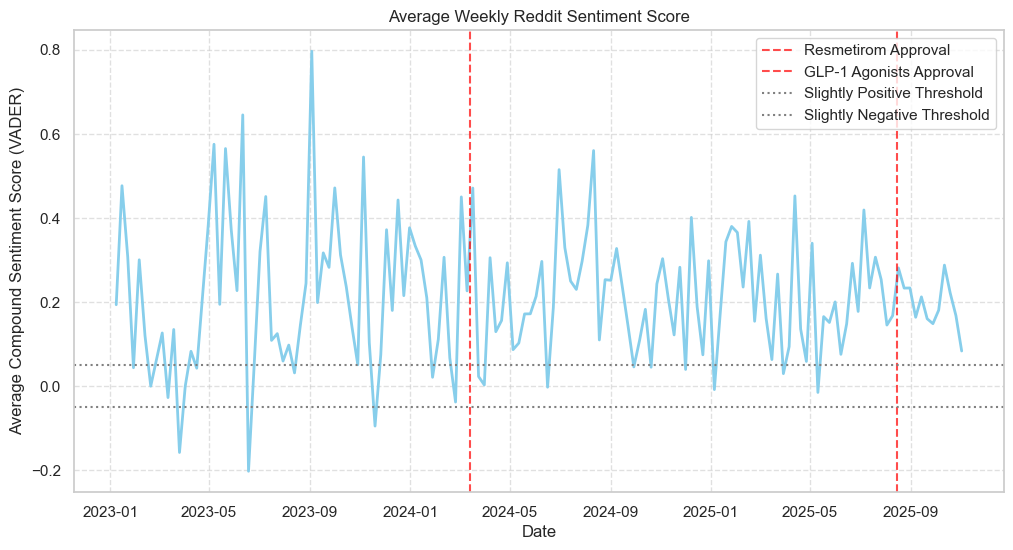

  > Displayed Reddit sentiment plot in notebook
Reddit sentiment analysis completed successfully using pre-collected data
This approach ensures consistent results for development and demonstration


In [4]:
# REDDIT ANALYSIS - DEVELOPMENT VERSION WITH PRE-COLLECTED DATA
# This block uses pre-collected Google Drive data for faster development and testing
# Rationale: Reddit API has rate limits and structural issues that slow down development
# Use this for reliable, fast analysis during project development

print("=== REDDIT ANALYSIS - DEVELOPMENT VERSION ===")
print("Using pre-collected data for fast, reliable analysis during development")
print("Google Drive fallback ensures consistent results despite API limitations")

try:
    from config import load_reddit_data_from_drive
    drive_data = load_reddit_data_from_drive()

    if drive_data is not None:
        print(f"Pre-collected data loaded: {drive_data.shape} records available")
        print(f"Data columns: {drive_data.columns.tolist()}")

        # Check if data is already in correct format
        if 'post_text' in drive_data.columns or 'text_to_analyze' in drive_data.columns:
            print("Data is already in processed format - proceeding directly to analysis")
            fixed_df = drive_data
        else:
            print("Data requires processing from nested format...")
            fixed_data = []
            for idx, row in drive_data.iterrows():
                for col in range(len(row)):
                    cell_data = row.iloc[col]  # Use .iloc to avoid the warning
                    if cell_data is not None and isinstance(cell_data, str) and cell_data.startswith('{'):
                        try:
                            import ast
                            parsed_data = ast.literal_eval(cell_data)
                            if isinstance(parsed_data, dict):
                                fixed_data.append(parsed_data)
                                break
                        except:
                            continue

            if fixed_data:
                import pandas as pd
                fixed_df = pd.DataFrame(fixed_data)
            else:
                print("Using original data structure since nested extraction failed")
                fixed_df = drive_data

        print(f"Data ready for analysis: {fixed_df.shape}")
        print(f"Final columns: {fixed_df.columns.tolist()}")

        # Process and analyze the data
        from process import process_reddit_data
        from analyze import analyze_reddit_sentiment

        processed_reddit = process_reddit_data(fixed_df)

        # Add Data Preview:
        print(f"Reddit data shape after processing: {processed_reddit.shape}")
        print("First 3 rows of Reddit sentiment data:")
        print(processed_reddit[['subreddit', 'timestamp', 'sentiment_score']].head(3))
        print("="*50)

        analyze_reddit_sentiment(processed_reddit, notebook_plot=True)
        print("Reddit sentiment analysis completed successfully using pre-collected data")
        print("This approach ensures consistent results for development and demonstration")
    else:
        print("Google Drive data unavailable - check file permissions")

except Exception as e:
    print(f"Development analysis failed: {e}")
    import traceback
    traceback.print_exc()

Running Advanced Reddit Sentiment Analysis...

[Advanced Analysis] Reddit Sentiment Statistical Analysis...
Data Quality Check:
  Total records: 9146
  Date range: 2023-01-03 18:53:42 to 2025-11-01 08:31:11
  Subreddits: 12
  Sentiment range: -0.999 to 1.000

Subreddit Sentiment Summary:
            sentiment_score                        timestamp  \
                       mean    std count                 min   
subreddit                                                      
AskDocs               0.223  0.663   779 2023-03-05 19:11:41   
MASH                  0.151  0.466  1089 2025-10-17 02:46:37   
MASLD                 0.587  0.394     4 2024-09-18 17:17:23   
NAFLD                 0.171  0.568   589 2024-06-27 13:15:26   
NASH                  0.158  0.496    28 2023-09-07 23:41:08   
Ozempic               0.313  0.539  1872 2023-01-19 15:27:13   
Supplements           0.184  0.571   677 2023-04-24 13:06:01   
Wegovy                0.314  0.536   416 2024-05-12 05:45:39   
medicin

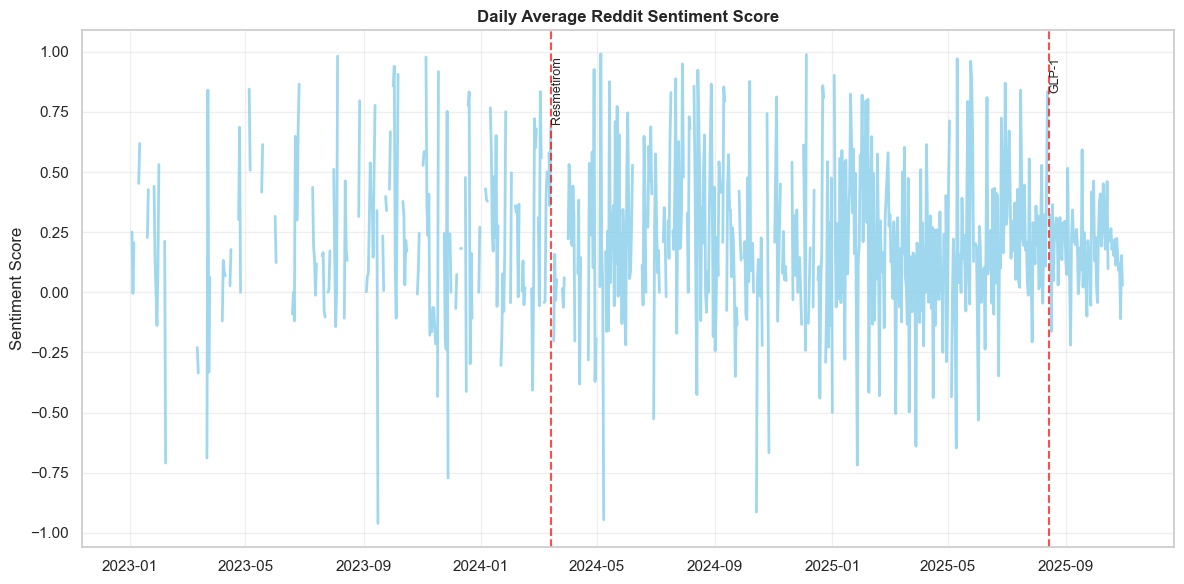

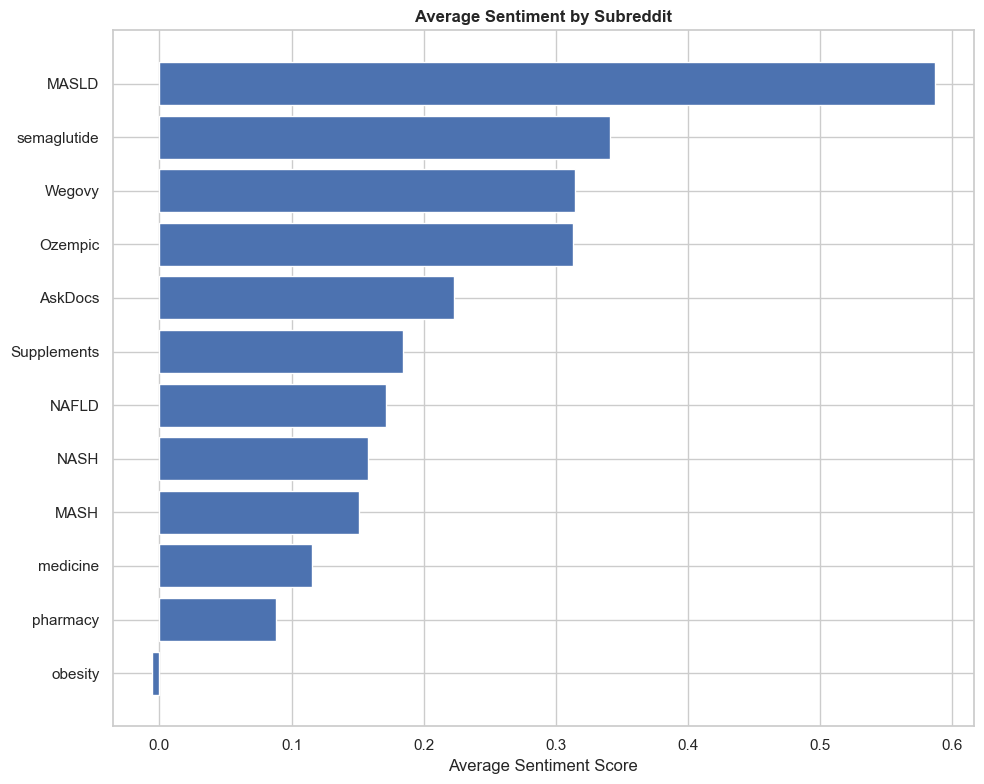

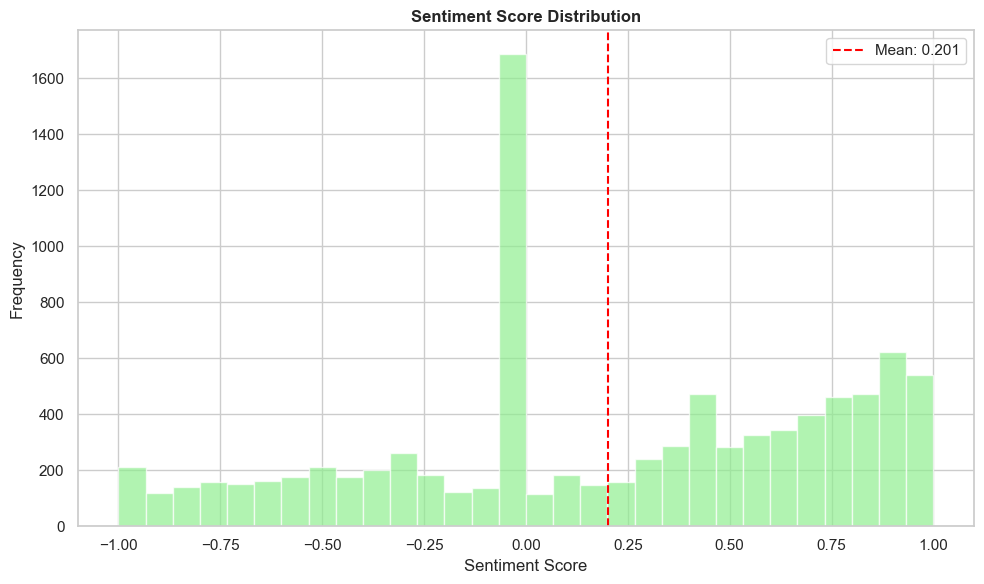

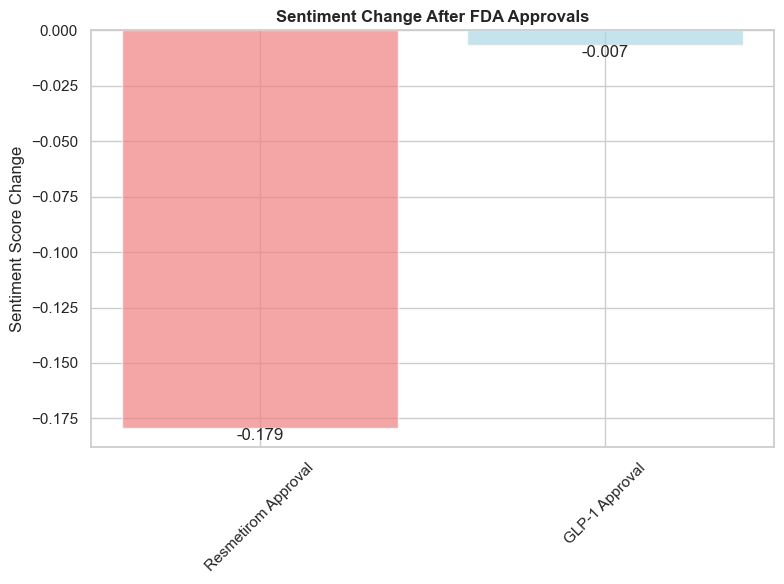


ADVANCED REDDIT SENTIMENT RESULTS

Overall Statistics:
  Total posts/comments analyzed: 9146
  Average sentiment: 0.201
  Date range: 2023-01-03 18:53:42 to 2025-11-01 08:31:11

FDA Event Impacts:
  Resmetirom Approval: -0.179 change (p=0.107) [not significant]
  GLP-1 Approval: -0.007 change (p=0.884) [not significant]


In [5]:
# ADVANCED REDDIT SENTIMENT ANALYSIS
print("Running Advanced Reddit Sentiment Analysis...")

from analyze import advanced_reddit_sentiment_analysis

# Make sure processed_reddit exists from previous cell
if 'processed_reddit' in locals():
    advanced_reddit_results = advanced_reddit_sentiment_analysis(processed_reddit, notebook_plot=True)

    print("\n" + "="*60)
    print("ADVANCED REDDIT SENTIMENT RESULTS")
    print("="*60)

    # Display key findings
    print(f"\nOverall Statistics:")
    print(f"  Total posts/comments analyzed: {advanced_reddit_results['overall_stats']['total_posts']}")
    print(f"  Average sentiment: {advanced_reddit_results['overall_stats']['mean_sentiment']:.3f}")
    print(f"  Date range: {advanced_reddit_results['overall_stats']['date_range']}")

    print(f"\nFDA Event Impacts:")
    for event_name, impact in advanced_reddit_results['event_impacts'].items():
        sig = "SIGNIFICANT" if impact['p_value'] < 0.05 else "not significant"
        print(f"  {event_name}: {impact['change_absolute']:+.3f} change (p={impact['p_value']:.3f}) [{sig}]")

else:
    print("Error: processed_reddit not found. Run Reddit analysis first.")

Running Reddit Topic Modeling Analysis...
Using raw Reddit data with text columns...

[Advanced Analysis] Reddit Topic Modeling...
Preparing text data for topic modeling...
  Available columns: ['subreddit', 'search_term', 'post_id', 'post_title', 'post_text', 'post_score', 'post_url', 'author', 'timestamp', 'num_comments', 'type', 'comment_id', 'comment_text', 'comment_score', 'text_to_analyze']
  Found text column: post_title
  Found text column: post_text
  Found text column: comment_text
  Found text column: text_to_analyze
  Texts for topic modeling: 8898
Creating TF-IDF features...
Running NMF topic modeling...

DISCOVERED TOPICS:
  Topic 0: im, just, dont, ive, good, feel, lbs, did, thats, day
  Topic 1: information, subreddit, automatically, concerns, does, use, thank, constitute, subredditmessagecomposetoraskdocs, agreeing
  Topic 2: private, permit, offering, message, discussion, thanks, rsemaglutide, subredditmessagecomposetorsemaglutide, faq, nonfda
  Topic 3: liver, fatty,

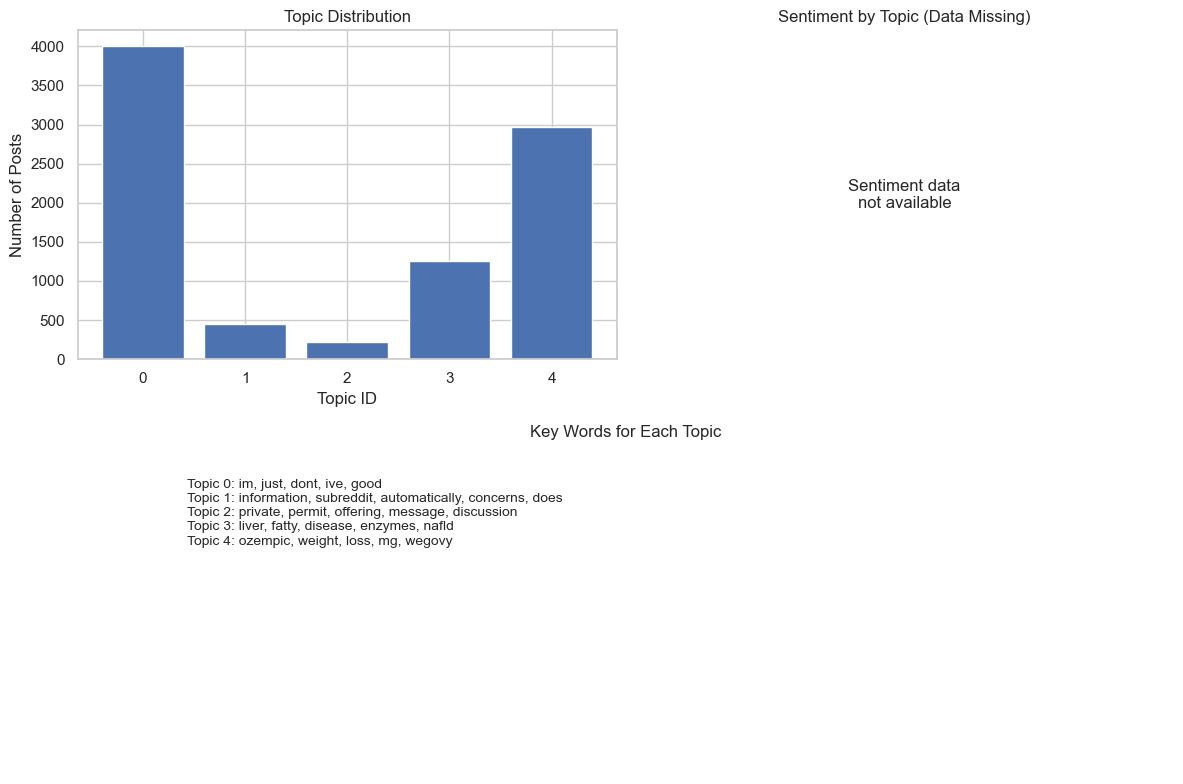

  > Saved topic analysis to: reddit_topic_analysis.png

TOPIC MODELING INSIGHTS

Key Findings:
  Topic_0: ['im', 'just', 'dont'] (posts: 4004, sentiment: N/A)
  Topic_1: ['information', 'subreddit', 'automatically'] (posts: 444, sentiment: N/A)
  Topic_2: ['private', 'permit', 'offering'] (posts: 225, sentiment: N/A)
  Topic_3: ['liver', 'fatty', 'disease'] (posts: 1253, sentiment: N/A)
  Topic_4: ['ozempic', 'weight', 'loss'] (posts: 2972, sentiment: N/A)


In [5]:
# ADVANCED REDDIT TOPIC MODELING
print("Running Reddit Topic Modeling Analysis...")

from analyze import analyze_reddit_topics

# Use the data BEFORE sentiment processing (has text columns)
if 'fixed_df' in locals():
    print("Using raw Reddit data with text columns...")
    topic_results = analyze_reddit_topics(fixed_df, num_topics=5, notebook_plot=True)

    if topic_results:
        print("\n" + "="*60)
        print("TOPIC MODELING INSIGHTS")
        print("="*60)

        print("\nKey Findings:")
        for topic_id, words in topic_results['topics'].items():
            topic_num = int(topic_id.split('_')[1])
            if topic_results['topic_sentiment'] is not None and topic_num in topic_results['topic_sentiment'].index:
                sentiment = topic_results['topic_sentiment'].loc[topic_num, 'mean']
                count = topic_results['topic_sentiment'].loc[topic_num, 'count']
                print(f"  {topic_id}: {words[:3]} (sentiment: {sentiment:.3f}, posts: {count})")
            else:
                # Get count from topic distribution instead
                count = topic_results['topic_subreddit_dist'].loc[topic_num].sum()
                print(f"  {topic_id}: {words[:3]} (posts: {count}, sentiment: N/A)")

elif 'drive_data' in locals():
    print("Using original Google Drive data...")
    topic_results = analyze_reddit_topics(drive_data, num_topics=5, notebook_plot=True)
else:
    print("ERROR: No suitable data found. Run Reddit EDA cell first.")
    print("Available variables:", [var for var in locals() if 'reddit' in var.lower() or 'data' in var.lower()])

Running Reddit Temporal Pattern Analysis...

[Advanced Analysis] Reddit Temporal Patterns...
Temporal Analysis Summary:
  Date range: 2023-01-03 18:53:42 to 2025-11-01 08:31:11
  Total days: 732


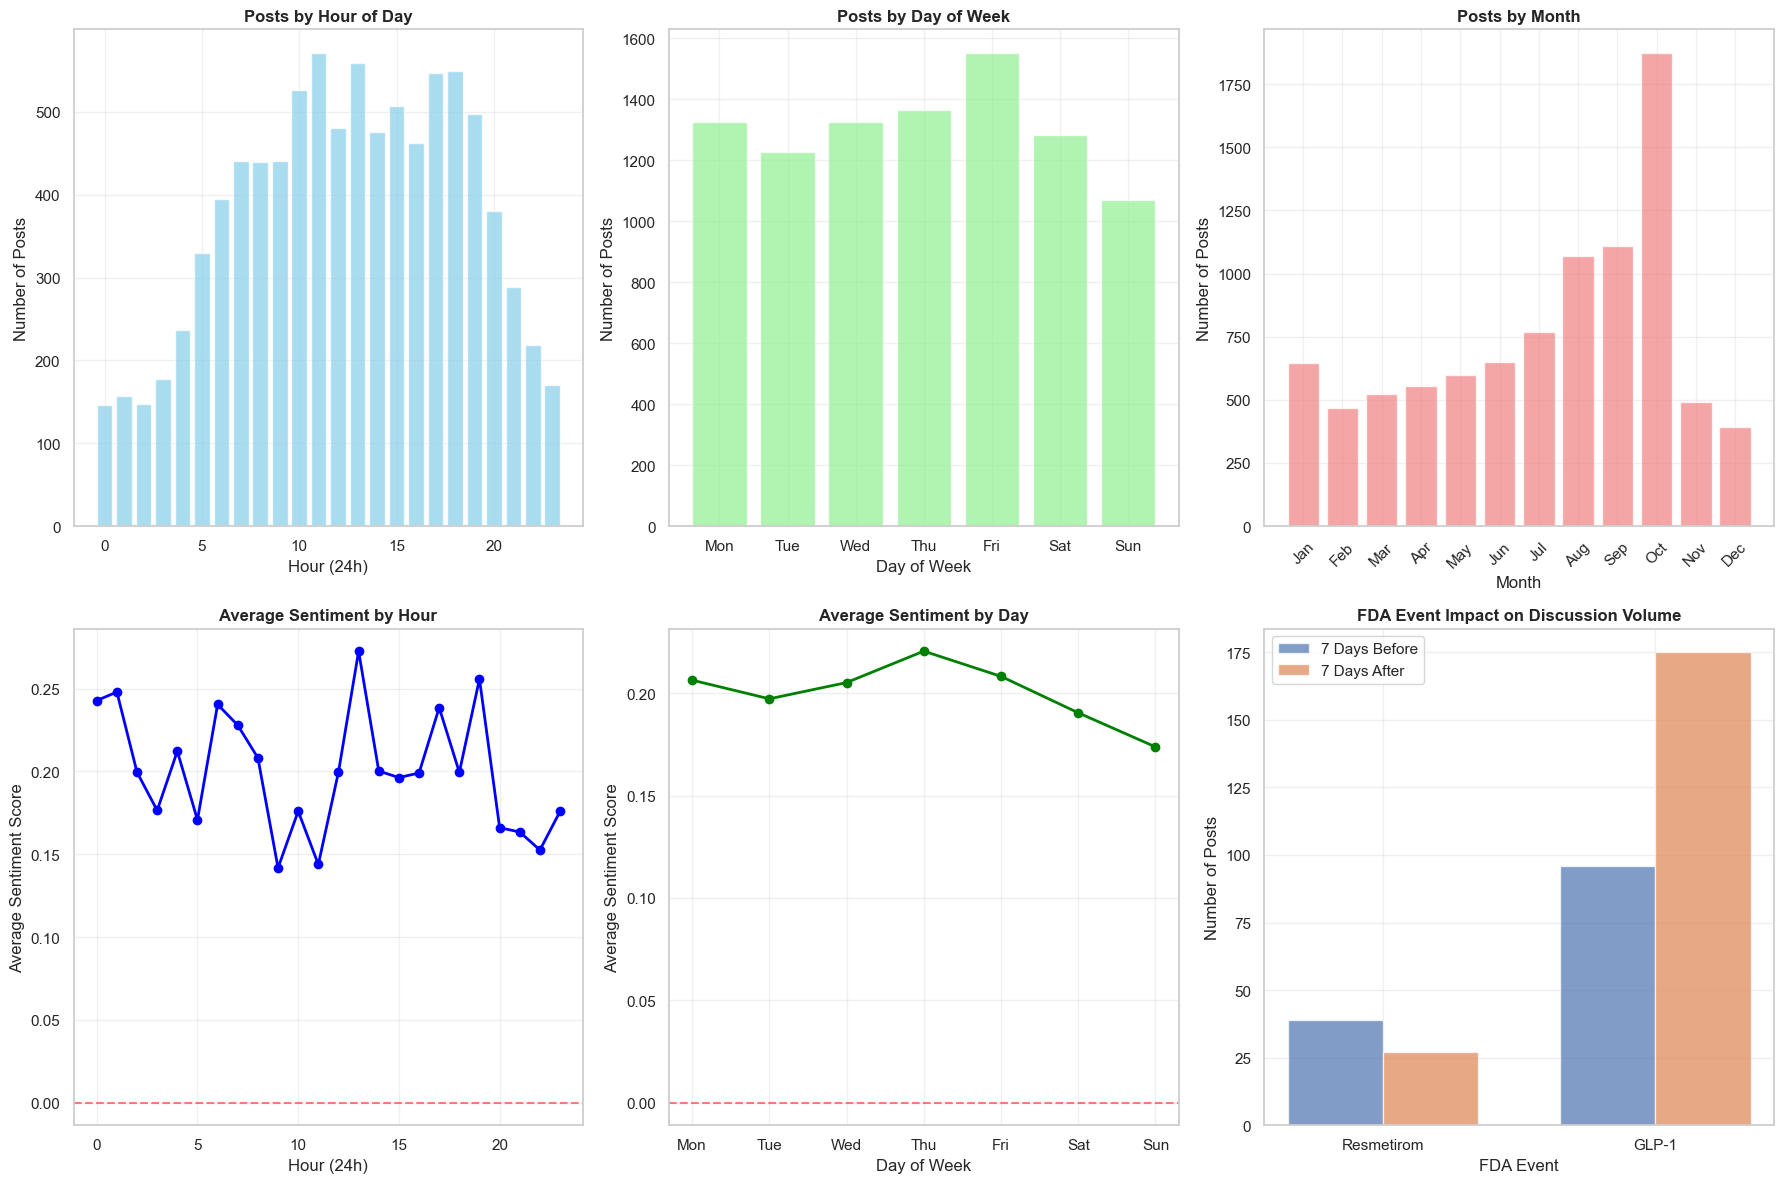

  > Saved temporal analysis to: reddit_temporal_patterns.png

TEMPORAL PATTERN INSIGHTS

Analysis Period: 2023-01-03 to 2025-11-01 (732 days)

Peak Discussion Times:
  Busiest hour: 11:00 (571 posts)
  Busiest day: Friday (1551 posts)

FDA Event Impacts:
  Resmetirom: 39 → 27 posts (-30.8% change)
  GLP-1: 96 → 175 posts (+82.3% change)


In [5]:
# ADVANCED REDDIT TEMPORAL PATTERN ANALYSIS
print("Running Reddit Temporal Pattern Analysis...")

from analyze import analyze_temporal_patterns

# Use processed_reddit which has sentiment scores
if 'processed_reddit' in locals():
    temporal_results = analyze_temporal_patterns(processed_reddit, notebook_plot=True)

    print("\n" + "="*60)
    print("TEMPORAL PATTERN INSIGHTS")
    print("="*60)

    print(f"\nAnalysis Period: {temporal_results['date_range']} ({temporal_results['total_days']} days)")

    print(f"\nPeak Discussion Times:")
    peak_hour = temporal_results['hourly_activity'].idxmax()
    peak_day = temporal_results['daily_activity'].idxmax()
    print(f"  Busiest hour: {peak_hour}:00 ({temporal_results['hourly_activity'].max()} posts)")
    print(f"  Busiest day: {peak_day} ({temporal_results['daily_activity'].max()} posts)")

    print(f"\nFDA Event Impacts:")
    for event, stats in temporal_results['event_impacts'].items():
        change = ((stats['post_event'] - stats['pre_event']) / stats['pre_event']) * 100
        print(f"  {event}: {stats['pre_event']} → {stats['post_event']} posts ({change:+.1f}% change)")

else:
    print("Error: processed_reddit not found. Run Reddit EDA cell first.")

Running Reddit-Google Trends Correlation Analysis...

[Advanced Analysis] Reddit-Google Trends Correlation...
Aligned period: 2023-01-03 to 2025-10-26 (1028 days)


C:\Users\somay\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\somay\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


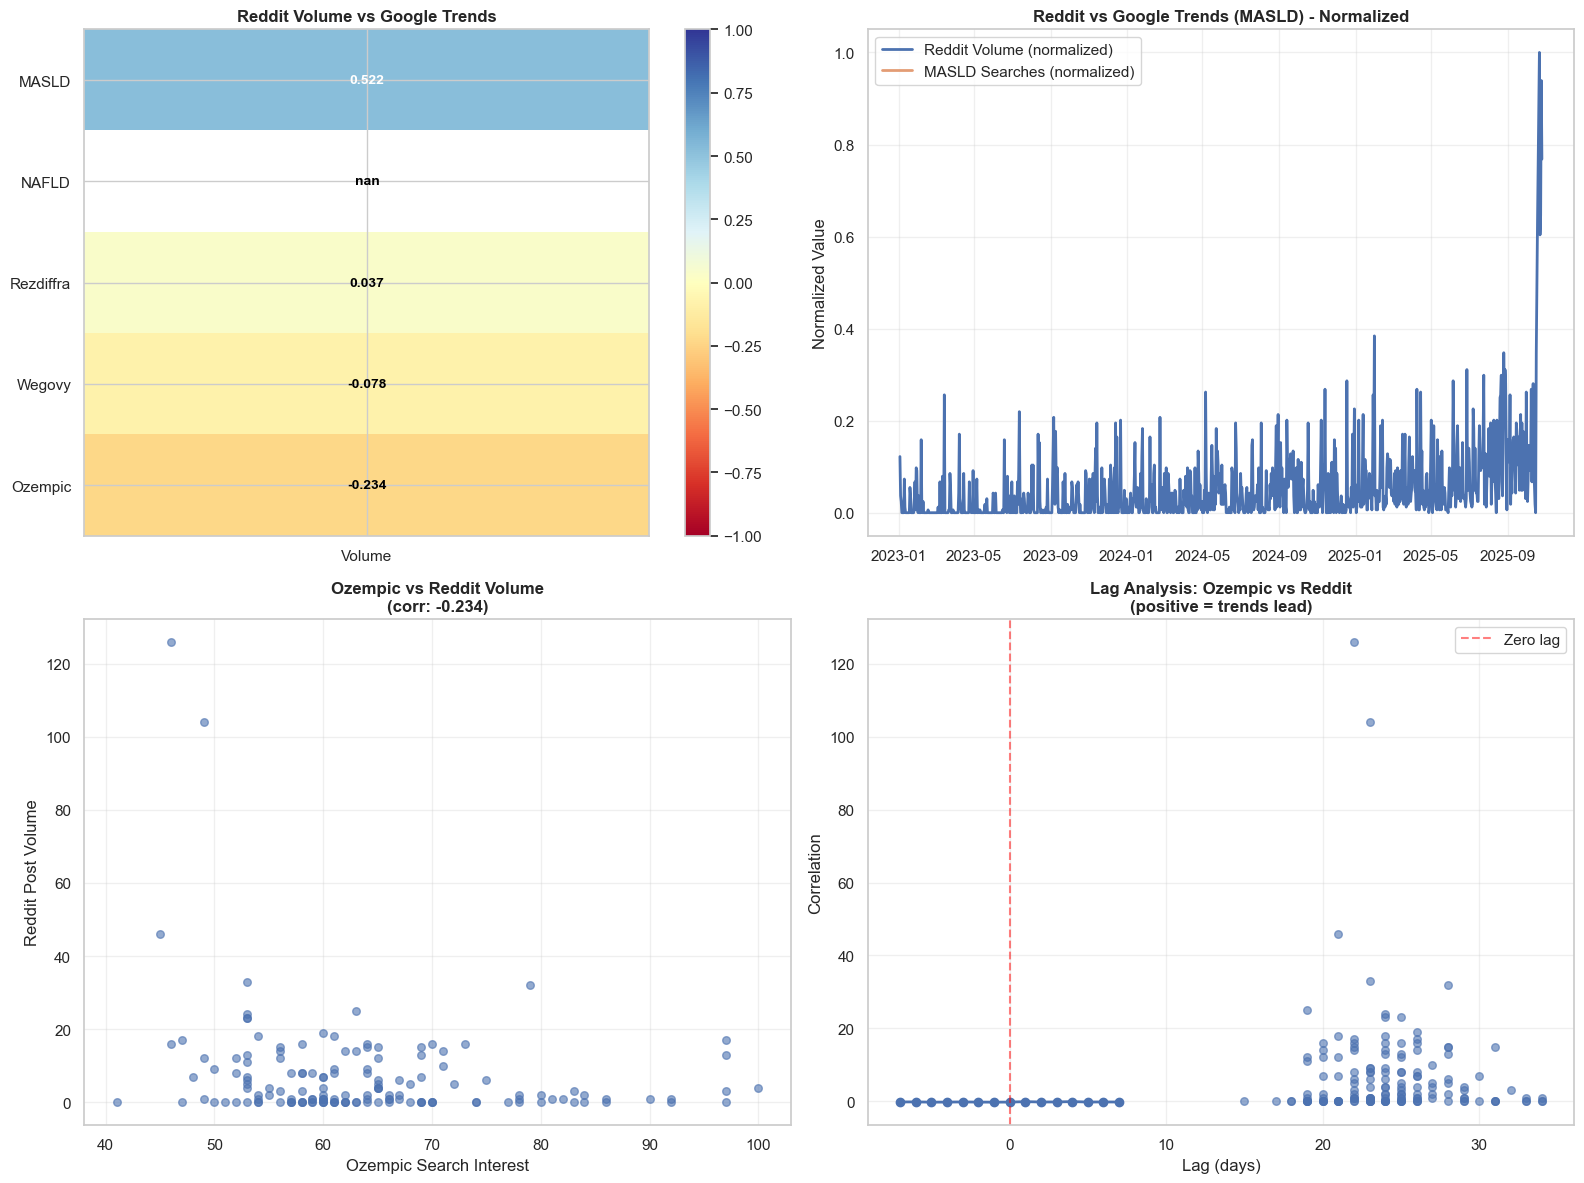

  > Saved correlation analysis to: reddit_trends_correlation.png

CROSS-PLATFORM CORRELATION INSIGHTS

Analysis Period: 2023-01-03 to 2025-10-26

Correlation Results:
  MASLD: Volume r=0.522
  NAFLD: Volume r=nan
  Rezdiffra: Volume r=0.037
  Wegovy: Volume r=-0.078
  Ozempic: Volume r=-0.234

Strongest Correlation: Ozempic (r=-0.234)


In [6]:
# ADVANCED REDDIT-GOOGLE TRENDS CORRELATION
print("Running Reddit-Google Trends Correlation Analysis...")

from analyze import correlate_reddit_trends

# Need both processed_reddit and processed_trends
if 'processed_reddit' in locals() and 'processed_trends' in locals():
    correlation_results = correlate_reddit_trends(processed_reddit, processed_trends, notebook_plot=True)

    print("\n" + "="*60)
    print("CROSS-PLATFORM CORRELATION INSIGHTS")
    print("="*60)

    print(f"\nAnalysis Period: {correlation_results['aligned_period']}")

    print(f"\nCorrelation Results:")
    for term, corrs in correlation_results['correlation_results'].items():
        print(f"  {term}: Volume r={corrs['volume_correlation']:.3f}")

    if correlation_results['best_correlations']:
        best_term, best_corr = correlation_results['best_correlations'][0]
        print(f"\nStrongest Correlation: {best_term} (r={best_corr['volume_correlation']:.3f})")

else:
    print("Error: Need both processed_reddit and processed_trends. Run both EDA cells first.")

Preparing data for Network Analysis...
Creating combined_text column from text_to_analyze...
Created combined_text column. Remaining posts: 9146
Running Reddit Network Analysis...

[Advanced Analysis] Reddit Network Analysis...
Building subreddit network...

Network Analysis Metrics:
  Nodes: 12
  Edges: 66
  Density: 1.000
  Diameter: 1
  Average path length: 1.00

Most Central Subreddits:
  NAFLD: Degree centrality = 1.000
  MASH: Degree centrality = 1.000
  NASH: Degree centrality = 1.000
  MASLD: Degree centrality = 1.000
  obesity: Degree centrality = 1.000

Community Detection:
  Detected 1 communities
  Community 0: ['NAFLD', 'MASH', 'NASH', 'Supplements', 'pharmacy', 'Wegovy', 'Ozempic', 'medicine', 'AskDocs', 'MASLD', 'obesity', 'semaglutide']


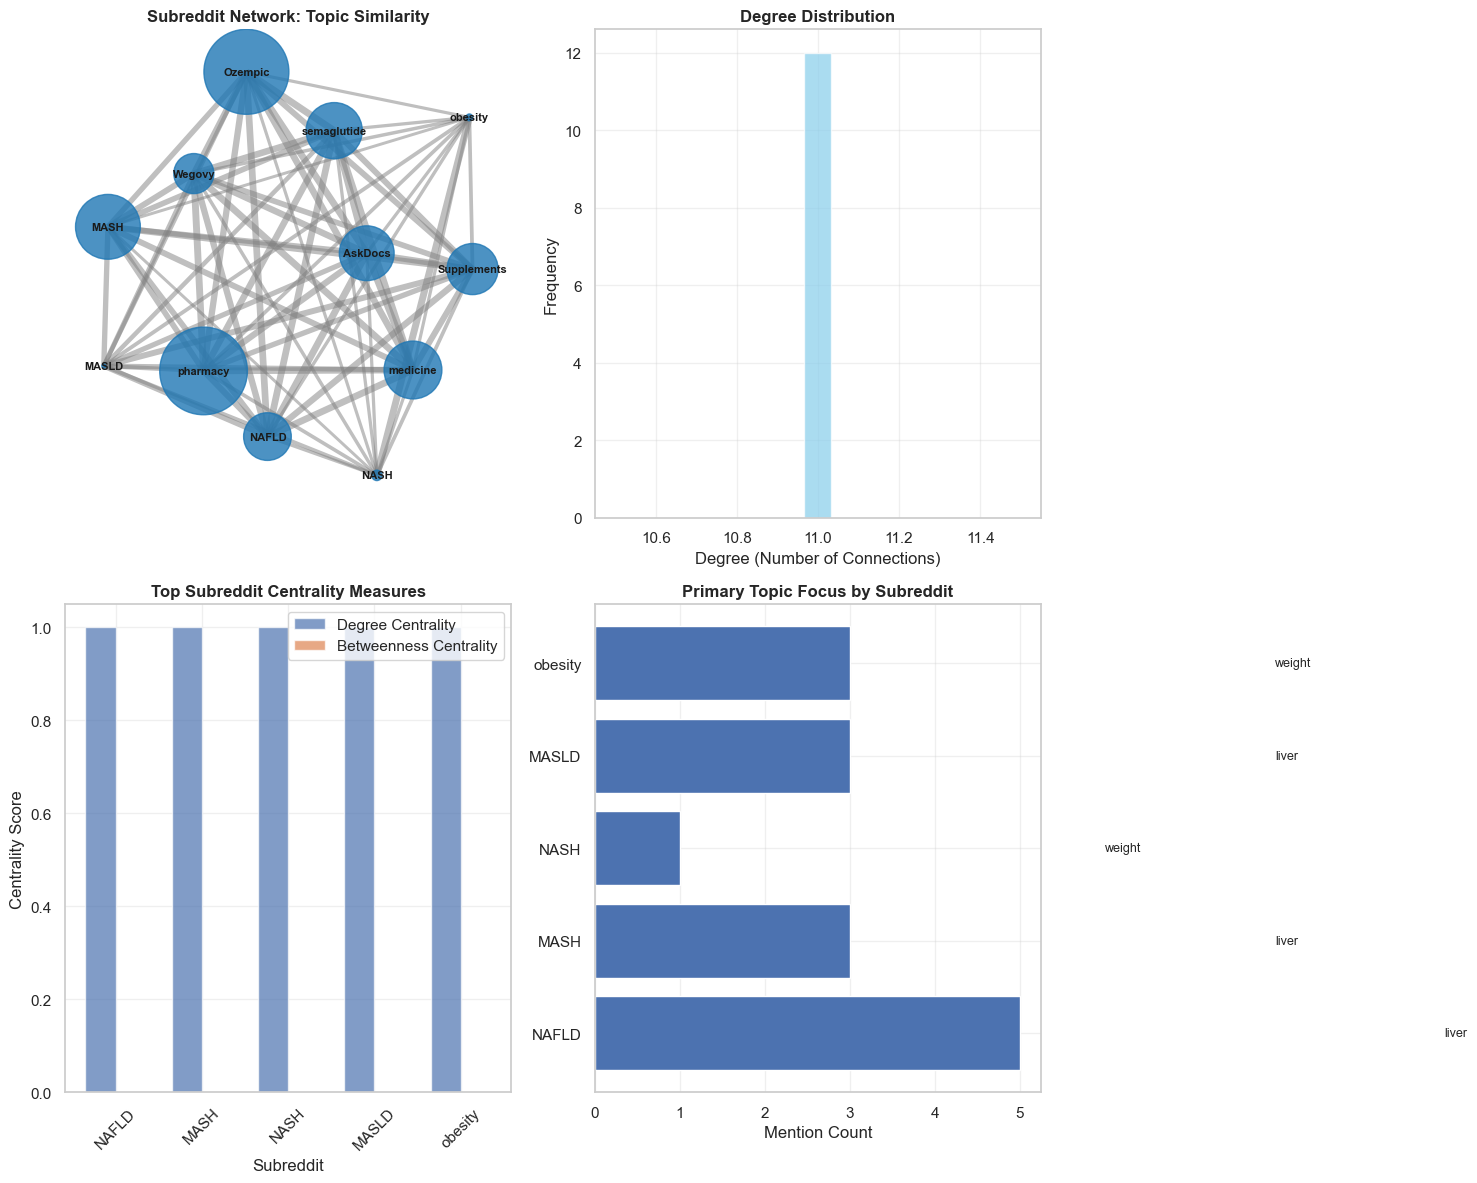

  > Saved network analysis to: reddit_network_analysis.png

NETWORK ANALYSIS INSIGHTS

Network Structure:
  Subreddits: 12
  Connections: 66
  Network density: 1.000
  Average connections: 11.0

Key Hubs (Most Connected):
  NAFLD: 1.000
  MASH: 1.000
  NASH: 1.000
  MASLD: 1.000
  obesity: 1.000

Information Bridges (High Betweenness):
  NAFLD: 0.000
  MASH: 0.000
  NASH: 0.000


In [5]:
# ADVANCED REDDIT NETWORK ANALYSIS
print("Preparing data for Network Analysis...")

# Create combined_text column from existing text_to_analyze
if 'combined_text' not in fixed_df.columns:
    print("Creating combined_text column from text_to_analyze...")
    fixed_df['combined_text'] = fixed_df['text_to_analyze'].fillna('')
    # Remove any posts with empty text
    fixed_df = fixed_df[fixed_df['combined_text'].str.strip() != '']
    print(f"Created combined_text column. Remaining posts: {len(fixed_df)}")

print("Running Reddit Network Analysis...")

from analyze import analyze_subreddit_networks

# Use fixed_df which now has the combined_text column
if 'fixed_df' in locals():
    network_results = analyze_subreddit_networks(fixed_df, notebook_plot=True)

    print("\n" + "="*60)
    print("NETWORK ANALYSIS INSIGHTS")
    print("="*60)

    print(f"\nNetwork Structure:")
    metrics = network_results['network_metrics']
    print(f"  Subreddits: {metrics['nodes']}")
    print(f"  Connections: {metrics['edges']}")
    print(f"  Network density: {metrics['density']:.3f}")
    print(f"  Average connections: {metrics['average_degree']:.1f}")

    print(f"\nKey Hubs (Most Connected):")
    top_hubs = sorted(network_results['degree_centrality'].items(),
                     key=lambda x: x[1], reverse=True)[:5]
    for subreddit, centrality in top_hubs:
        print(f"  {subreddit}: {centrality:.3f}")

    print(f"\nInformation Bridges (High Betweenness):")
    top_bridges = sorted(network_results['betweenness_centrality'].items(),
                        key=lambda x: x[1], reverse=True)[:3]
    for subreddit, centrality in top_bridges:
        print(f"  {subreddit}: {centrality:.3f}")

else:
    print("Error: fixed_df not found. Run Reddit EDA cell first.")


[Loading] Fetching PubMed article metadata...
  > Found 1000 articles. Fetching details...
[Success] PubMed data saved to: pubmed_masld_articles_20251115_2103.csv (1000 records)
[Processing] Cleaning PubMed data...
  > PubMed data ready. Shape: (620, 8)
Analyzing 620 total PubMed publications
PubMed data shape: (620, 5)
First 3 rows of PubMed data:
                                                 title publication_date  \
708  GLP-1 Receptor Agonists in Non-Alcoholic Fatty...       2023-01-01   
759  Glucagon-like Peptide-1 Receptor-based Therape...       2023-01-01   
736  Approach to the Patient With Nonalcoholic Fatt...       2023-01-01   

                                               journal  
708        International journal of molecular sciences  
759                                  Endocrine reviews  
736  The Journal of clinical endocrinology and meta...  

[Analysis] Analyzing PubMed Publications...
  > Saved PubMed comparison plot to: pubmed_drug_comparison_timeline.png


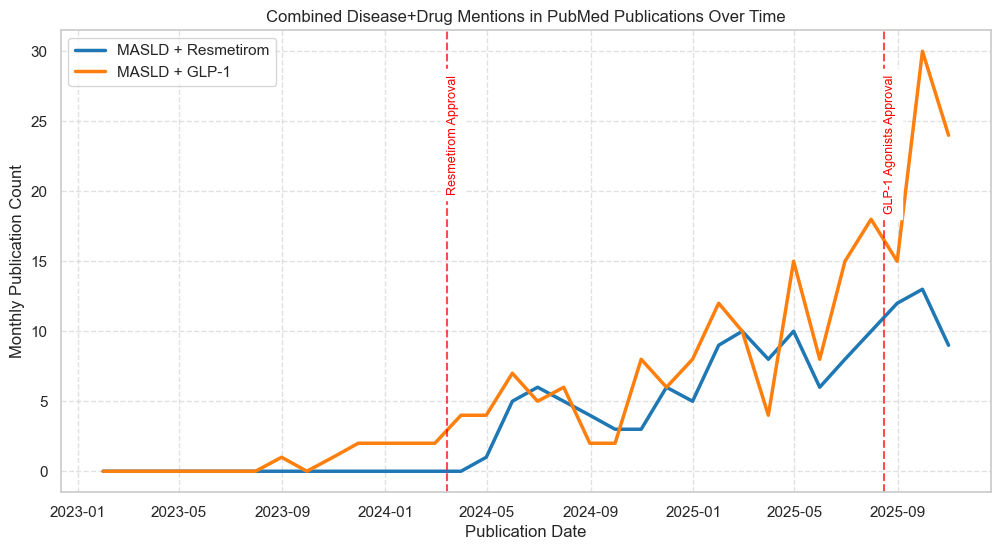

  > Displayed PubMed comparison plot in notebook
PubMed analysis completed


In [3]:
# PubMed Analysis
pubmed_data = get_pubmed_data()
if pubmed_data is not None:
    processed_pubmed = process_pubmed_data(pubmed_data)

    # Use ALL data for the analysis (not filtered)
    print(f"Analyzing {len(processed_pubmed)} total PubMed publications")

    # Add Data Preview:
    print(f"PubMed data shape: {processed_pubmed.shape}")
    print("First 3 rows of PubMed data:")
    print(processed_pubmed[['title', 'publication_date', 'journal']].head(3))
    print("="*50)

    # Process PubMed data using the publication rate analysis
    from analyze import analyze_pubmed_publication_rate
    analyze_pubmed_publication_rate(processed_pubmed, notebook_plot=True)
    print("PubMed analysis completed")


[Advanced Analysis] PubMed Advanced Analysis...

STATISTICAL SIGNIFICANCE TESTING
Resmetirom FDA Approval Impact:
  Before: 0 publications, After: 133 publications
  Effect: Created entirely new research area (no publications before approval)
  Significance: *** (clinically significant)

GLP-1 FDA Approval Impact:
  Before: 159 publications, After: 54 publications
  Odds Ratio: 3.615, p-value: 0.0000
  Significance: *
  > Saved timeline to: advanced_pubmed_timeline.png
  > Saved focus areas to: advanced_pubmed_focus_areas.png
  > Saved top journals to: advanced_pubmed_top_journals.png
  > Saved FDA impact to: advanced_pubmed_fda_impact.png

PUBMED ADVANCED ANALYSIS - SUMMARY TABLE
                         Metric              Value
             Total Publications                620
MASLD + Resmetirom Publications                133
     MASLD + GLP-1 Publications                213
        Resmetirom Pre-Approval                  0
       Resmetirom Post-Approval                133
   

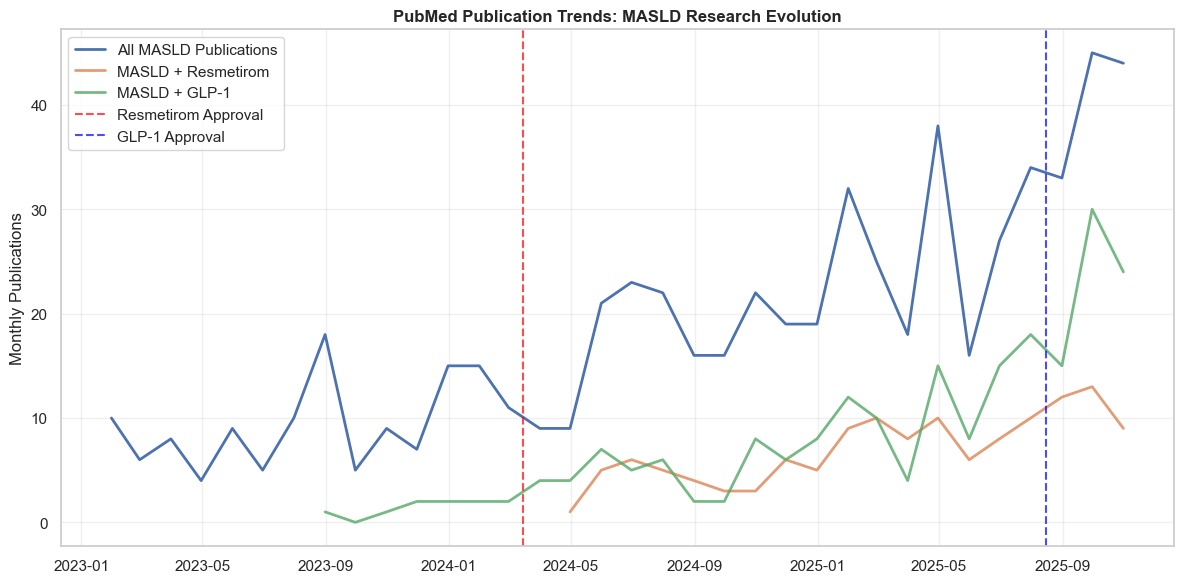

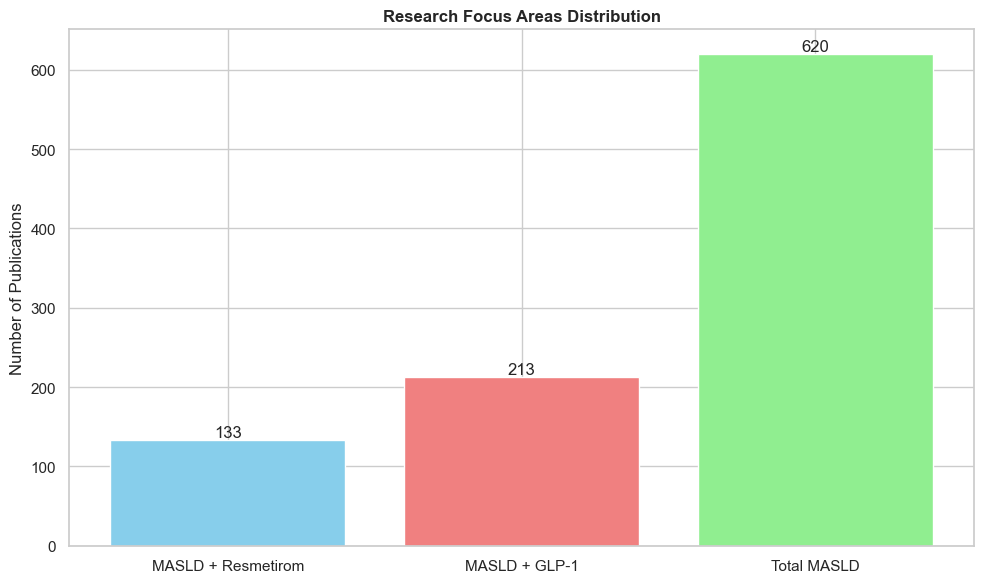

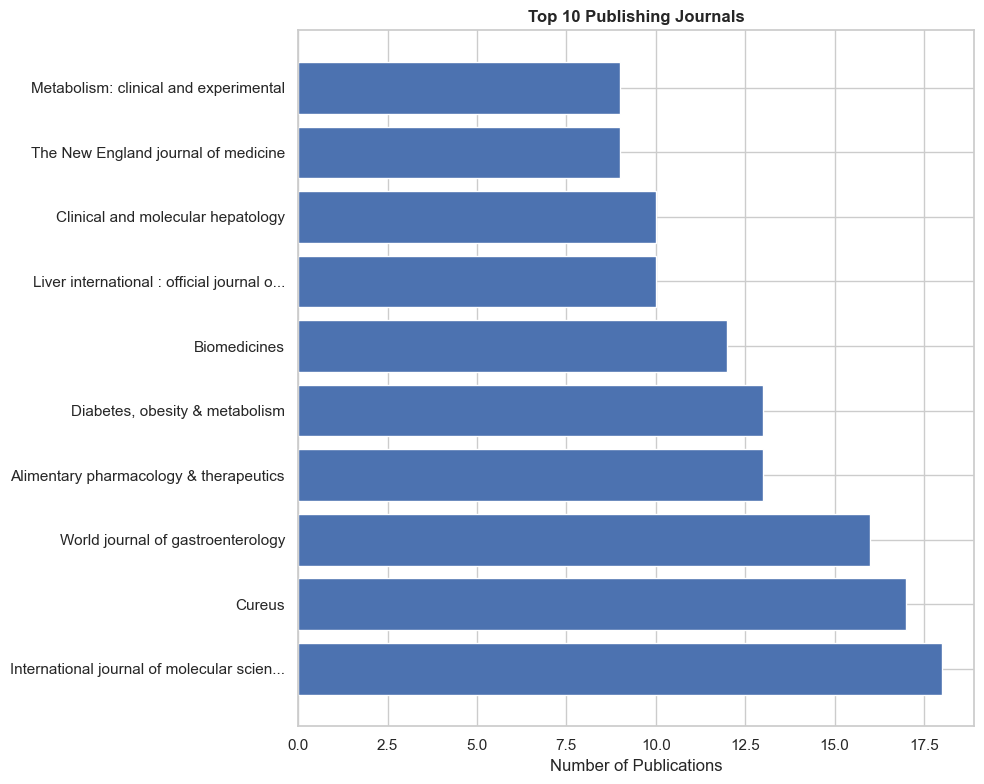

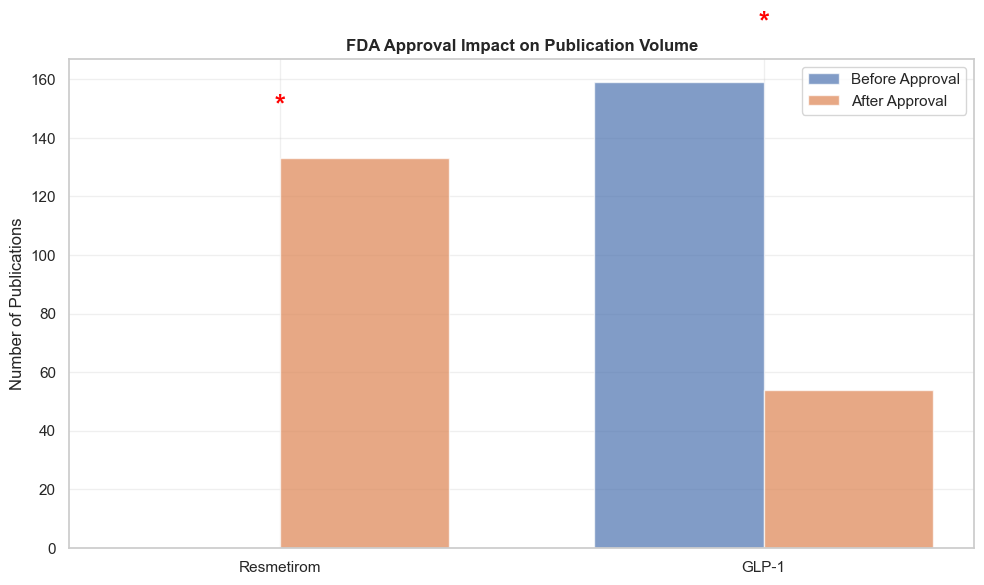

Total publications analyzed: 620


In [4]:
# Advanced PubMed analysis
pubmed_advanced_results = advanced_pubmed_analysis(processed_pubmed, notebook_plot=True)
print(f"Total publications analyzed: {pubmed_advanced_results['total_publications']}")


[Loading] Fetching stock data for: ['NVO', 'MDGL']


C:\Users\somay\PycharmProjects\FinalProject_Somaya_Albhaisi\src\load.py:221: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_stocks = yf.download(
[*********************100%***********************]  2 of 2 completed

[Success] Stock data saved to: stock_prices.csv
[Processing] Cleaning Stock data...
Flattened columns: ['MDGL_Open', 'MDGL_High', 'MDGL_Low', 'MDGL_Close', 'MDGL_Volume', 'NVO_Open', 'NVO_High', 'NVO_Low', 'NVO_Close', 'NVO_Volume']
  > Stock data ready. Shape: (707, 2)
Stock data shape: (707, 2)
First 3 rows of stock data:
            NVO_Close  MDGL_Close
Date                             
2023-01-03  65.815369  285.420013
2023-01-04  65.724068  274.480011
2023-01-05  65.474174  271.709991
Stock price ranges:
NVO: $45.38 - $144.04
MDGL: $120.40 - $458.66

[Analysis] Analyzing Stock Data...


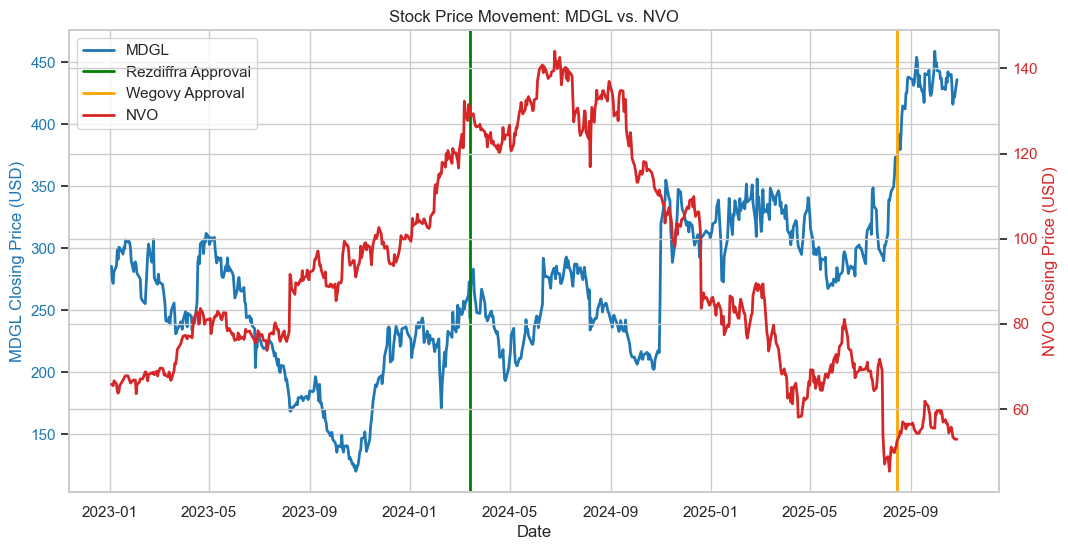

  > Displayed stock plot in notebook
  > MDGL Price Change around Resmetirom FDA: 4.06%
  > NVO Price Change around GLP-1 FDA: 6.30%
Stock analysis completed


In [8]:
# Stock
stock_data = get_stock_data()
if stock_data is not None:
    processed_stocks = process_stock_data(stock_data)

    # Add Data Preview:
    print(f"Stock data shape: {processed_stocks.shape}")
    print("First 3 rows of stock data:")
    print(processed_stocks.head(3))
    print("Stock price ranges:")
    print(f"NVO: ${processed_stocks['NVO_Close'].min():.2f} - ${processed_stocks['NVO_Close'].max():.2f}")
    print(f"MDGL: ${processed_stocks['MDGL_Close'].min():.2f} - ${processed_stocks['MDGL_Close'].max():.2f}")
    print("="*50)

    analyze_stock_and_events(processed_stocks, notebook_plot=True)
    print("Stock analysis completed")


[Media Cloud] Checking Media Cloud data availability...
[Media Cloud] Using existing data in: media_cloud
[Media Cloud] Data ready for analysis
Media Cloud datasets loaded:
  disease: 1036 time points
  disease: 100 unique sources
  resmetirom: 1036 time points
  resmetirom: 23 unique sources
  glp1: 1036 time points
  glp1: 100 unique sources
Running Media Cloud timeline analysis...

[Analysis] Analyzing Media Cloud Timeline...

[Media Cloud] Checking Media Cloud data availability...
[Media Cloud] Using existing data in: media_cloud
[Media Cloud] Data ready for analysis


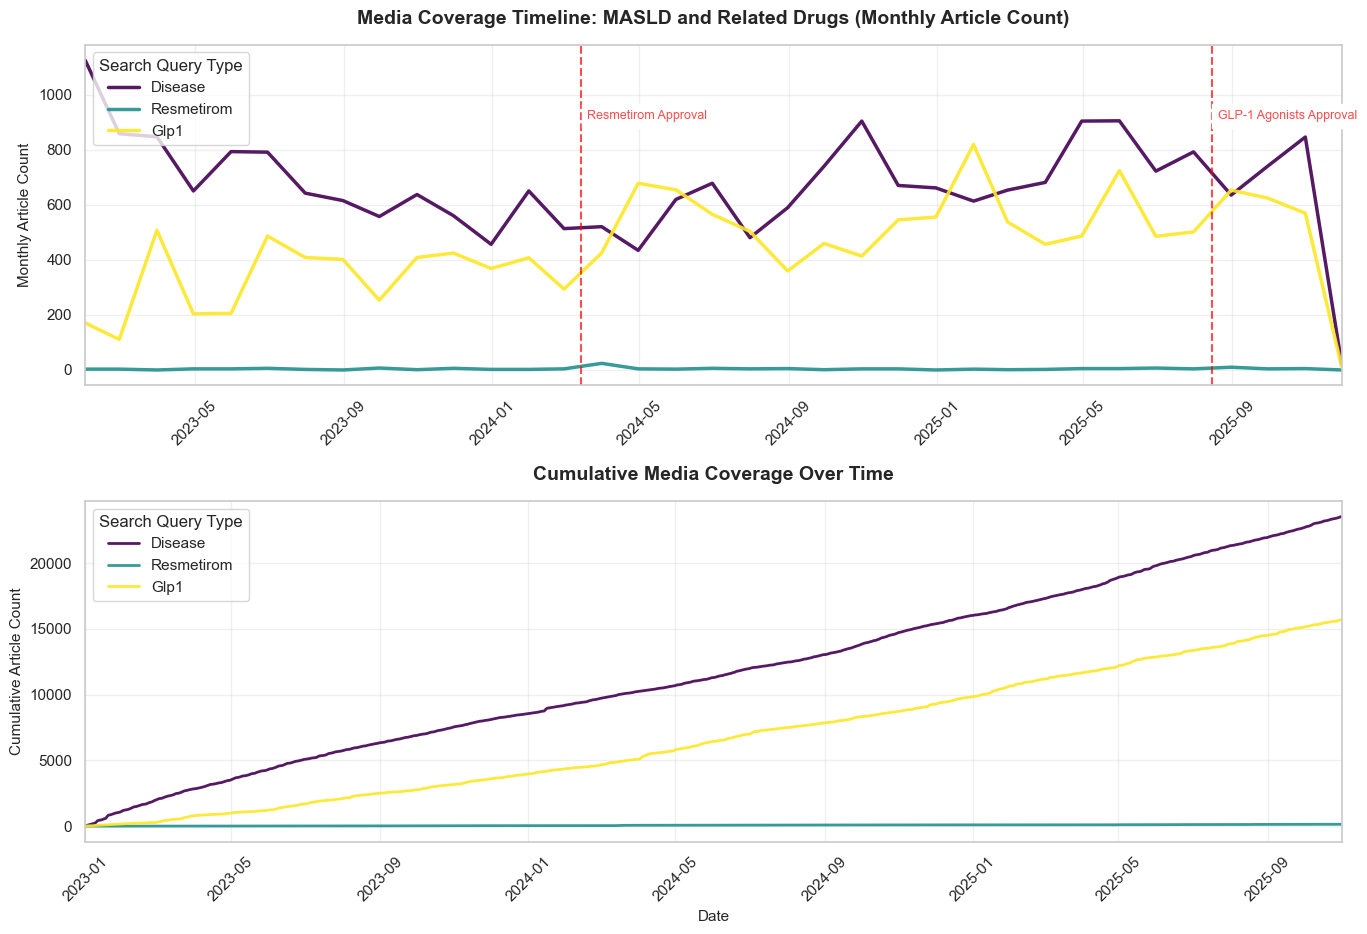

  > Displayed Media Cloud timeline in notebook
Media Cloud analysis completed!


In [9]:
# Media Cloud
MEDIA_CLOUD_ANALYSIS_SUBDIR = "media_cloud_analysis"

media_cloud_available = get_media_cloud_data()
if media_cloud_available:
    try:
        from analyze import analyze_media_cloud_timeline, analyze_media_cloud_sources

        # Add Data Preview:
        print("Media Cloud datasets loaded:")
        from analyze import load_media_cloud_datasets
        datasets = load_media_cloud_datasets()
        for name, data in datasets.items():
            if 'counts' in data:
                print(f"  {name}: {data['counts'].shape[0]} time points")
            if 'sources' in data:
                print(f"  {name}: {data['sources'].shape[0]} unique sources")
        print("="*50)

        print("Running Media Cloud timeline analysis...")
        timeline_results = analyze_media_cloud_timeline(notebook_plot=True)

        print("Media Cloud analysis completed!")

    except Exception as e:
        print(f"Error: {e}")